# POLO Data Set

In [1]:
import lxml.etree as etree
import json
import re
import pathlib

import pandas

regex = re.compile("JSON.parse\((.*)\)")
coches = []

for file in (pathlib.Path.cwd()/"POLO").rglob("*.html"):
    doc = etree.parse(file, etree.HTMLParser())

    script = doc.xpath("""//script[contains(text(), "__INITIAL_PROPS__")]""")

    if not script:
        print("Skipping:", file)
        continue

    result = regex.search(script[0].text)
    result = result.group(1)
    result = eval(result)

    result = json.loads(result)


    for r in result["initialResults"]["items"]:
        for k in "photos","img","imgUrl":
            r.pop(k, None)
        coches.append(r)

frame = pandas.DataFrame(coches)

frame.describe()


,bodyTypeId,financedPrice,fuelTypeId,km,price,provinceId,specificFuelTypeId,taxTypeId,warrantyId,warrantyMonths,year
count,838.000000,659.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,774.000000,757.000000,905.000000
mean,1.001193,13589.406677,1.749171,91530.367956,12742.137017,26.129282,1.749171,1.085083,2.067183,12.713342,2014.838674
std,0.034544,4064.743837,0.433730,64007.167246,5568.455251,13.843303,0.433730,0.279159,0.546074,4.404002,5.475251
min,1.000000,2600.000000,1.000000,5.000000,500.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1987.000000
25%,1.000000,10970.000000,1.000000,43000.000000,9450.000000,11.000000,1.000000,1.000000,2.000000,12.000000,2013.000000
50%,1.000000,13490.000000,2.000000,82247.000000,12990.000000,28.000000,2.000000,1.000000,2.000000,12.000000,2017.000000
75%,1.000000,15645.000000,2.000000,121883.000000,15999.000000,36.000000,2.000000,1.000000,2.000000,12.000000,2018.000000
max,2.000000,28000.000000,2.000000,413352.000000,34900.000000,52.000000,2.000000,2.000000,6.000000,48.000000,2022.000000


<AxesSubplot:xlabel='km', ylabel='price'>

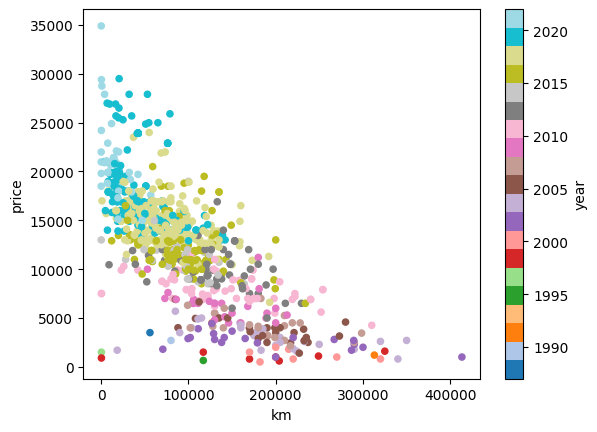

In [2]:
from collections import defaultdict

frame.plot.scatter(x="km", y="price", c="year", colormap="tab20")
